In [8]:
https://github.com/unaoya/pyML


import numpy as np
import matplotlib.pyplot as plt

In [9]:
x=np.array([[1.1,0.1],[1.9,3.1],[1.8,0.8]])
y=np.array([1,1,-1],dtype=int)
w = np.array([-2.0, 1.0])
b=2.0

In [48]:
def plotline(w, b, plt):
    x0 = np.linspace(1, 10, 2)
    x1 = -(b + w[0]*x0)/w[1]
    plt.plot(x0, x1)

In [47]:
print(np.linspace(1, 2, 2))

[ 1.  2.]


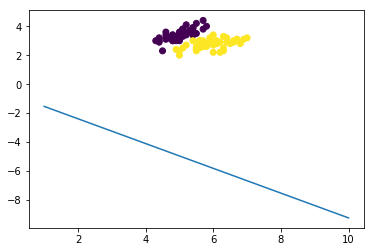

In [49]:
plt.scatter(x[:,0], x[:,1], c=y)
plotline(w, b, plt)
plt.show()

In [12]:
def predict(x, w, b):
    if b+w.dot(x)>0:
        return 1
    else:
        return -1

In [13]:
predict(x[0,:], w, b)

-1

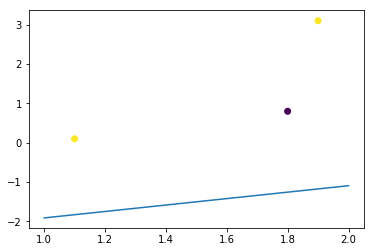

In [14]:
w = w + x[0, :]
b = b + y[0]
plotline(w, b, plt)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [15]:
print([predict(x[i, :], w, b) for i in range(3)])
print(y)

[1, 1, 1]
[ 1  1 -1]


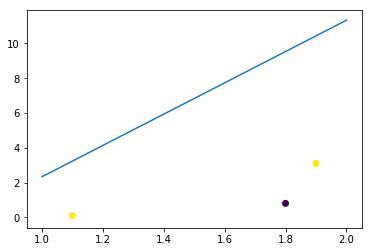

In [16]:
w = w + y[2]*x[2, :]
b = b + y[2]
plotline(w, b, plt)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [17]:
print([predict(x[i, :], w, b) for i in range(3)])
print(y)

[-1, -1, -1]
[ 1  1 -1]


In [18]:
def update(x, y, w, b, eta):

    if predict(x, w, b)==y:
        pass
    else:
        w, b = w + eta*x*y, b + eta*y
    return w, b

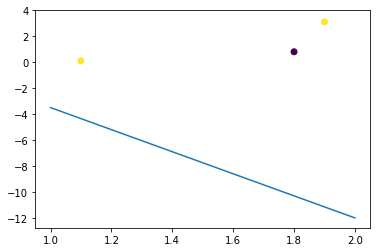

[-1, -1, -1]
[ 1  1 -1]
[-3.4 -0.4] 2.0


In [19]:
for i in range(3):
    w, b = update(x[i, :], y[i], w, b, 1)
plotline(w, b, plt)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()
print([predict(x[i, :], w, b) for i in range(3)])
print(y)
print(w, b)

In [20]:
def acc(x, y, w, b):
    y_pred = np.array([predict(x[i], w, b) for i in range(y.shape[0])])
    return (y == y_pred).sum() / y.shape[0]

In [21]:
acc(x, y, w, b)

0.33333333333333331

In [22]:
y.shape

(3,)

In [23]:
print (y)

[ 1  1 -1]


In [24]:
x.shape

(3, 2)

In [25]:
class Perceptron():
    def __init__(self, w, b, n_iter, eta):
        self.w=w
        self.b=b
        self.n_iter=n_iter
        self.eta=eta
        
    def fit(self, x, y):
        for i in range(self.n_iter):
            for j in range (y.shape[0]):
                if self.predict(x[j]) == y[j]:
                    pass
                else:
                    self.w, self.b = self.w + self.eta * x[j] * y[j], self.b + self.eta * y[j]
                    
    def predict(self, x):
        if self.b + self.w.dot(x) > 0:
            return 1
        else:
            return -1
        
    def acc(self, x, y):
        y_pred = np.array([self.predict(x[i]) for i in range(y.shape[0])])
        return (y == y_pred).sum() / y.shape[0]

In [26]:
# 正解率が一定以上になるまで自動ループするクラス
class Perceptron2():
    def __init__(self, w, b, n_iter, eta):
        self.w=w
        self.b=b
        self.n_iter=n_iter
        self.eta=eta
        self.r=[]
        
    def fit(self, x, y):
        while self.acc(x, y) < 1:
            self.r.append(self.acc(x, y))
#         for i in range(self.n_iter):
            for j in range (y.shape[0]):
                if self.predict(x[j]) == y[j]:
                    pass
                else:
                    self.w, self.b = self.w + self.eta * x[j] * y[j], self.b + self.eta * y[j]
                    
    def predict(self, x):
        if self.b + self.w.dot(x) > 0:
            return 1
        else:
            return -1
        
    def acc(self, x, y):
        y_pred = np.array([self.predict(x[i]) for i in range(y.shape[0])])
        return (y == y_pred).sum() / y.shape[0]

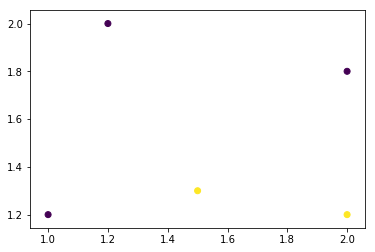

In [27]:
x, y = np.array([[1, 1.2], [2, 1.8], [1.2, 2], [2, 1.2], [1.5, 1.3]]), np.array([-1, -1, -1, 1, 1])
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

In [41]:
from sklearn import datasets
iris = datasets.load_iris()

xx, yy = iris.data, iris.target
x_, y = xx[yy != 2], yy[yy != 2]
x = x_[:, 0:2]
for i in range(len(y)):
    if y[i] == 0:
        y[i] = -1
        
print (x.shape[1])
print (xx)
print (y)

2
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3

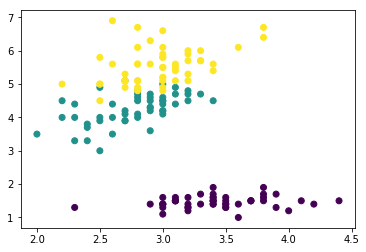

In [66]:
b = np.random.rand(1)
w = np.random.rand(x.shape[1])
# plotline(w, b, plt)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

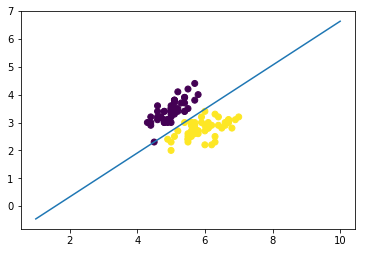

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0
[ 0.42213454] [ 0.53247757  0.62223273]
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.66000000000000003, 0.5, 0.5, 0.5, 0.69999999999999996, 0.52000000000000002, 0.5, 0.5, 0.70999999999999996, 0.54000000000000004, 0.5, 0.5, 0.84999999999999998, 0.56999999999999995, 0.52000000000000002, 0.96999999999999997, 0.69999999999999996, 0.58999999999999997, 0.52000000000000002, 0.96999999999999997, 0.69999999999999996, 0.59999999999999998, 0.54000000000000004, 0.96999999999999997, 0.76000000000000001, 0.58999999999999997, 0.97999999999999998, 0.84999999999999998, 0.66000000000000003, 0.5899999999

In [50]:
clf = Perceptron2(w, b, 20, 0.1)
clf.fit(x, y)

plotline(clf.w, clf.b, plt)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

print([clf.predict(x[i]) for i in range(y.shape[0])])
print(clf.acc(x, y))
print(b, w)
print(clf.r)

ここから下で、3つのデータの場合についての分類を行う


In [65]:
from sklearn import datasets
iris = datasets.load_iris()

xx, yy = iris.data, iris.target
x_, y = xx, yy
x = x_[:, 1:3]
        
print (x.shape[1])
print(x_)
print (x)
print (y)

2
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3

In [67]:
# 3つを分類するクラス
class Perceptron3():
    def __init__(self, w, b, n_iter, eta):
        self.w=w
        self.b=b
        self.n_iter=n_iter
        self.eta=eta
        
    def fit(self, x, y):
        for i in range(self.n_iter):
            for j in range (y.shape[0]):
                if self.predict(x[j]) == y[j]:
                    pass
                else:
                    self.w, self.b = self.w + self.eta * x[j] * y[j], self.b + self.eta * y[j]
                    
    def predict(self, x):
        if self.b + self.w.dot(x) > 0:
            return 1
        else:
            return -1
        
    def acc(self, x, y):
        y_pred = np.array([self.predict(x[i]) for i in range(y.shape[0])])
        return (y == y_pred).sum() / y.shape[0]

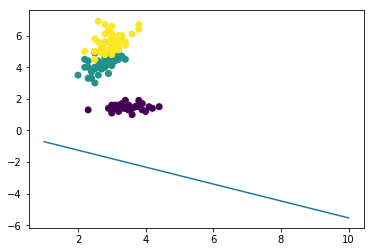

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.333333333333
[ 0.20926669] [ 0.47448151  0.13823414]


In [70]:
clf = Perceptron3(w, b, 30, 0.1)
clf.fit(x, y)

plotline(clf.w, clf.b, plt)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.show()

print([clf.predict(x[i]) for i in range(y.shape[0])])
print(clf.acc(x, y))
print(b, w)

In [71]:
print(zip(x, y))